# Deep convolutional generative adversarial network (DCGAN)

## Table of contents

1. [Understanding DCGAN](#understanding-dcgan)
2. [Setting up the environment](#setting-up-the-environment)
3. [Preparing the dataset](#preparing-the-dataset)
4. [Building the Generator](#building-the-generator)
5. [Building the Discriminator](#building-the-discriminator)
6. [Initializing weights for the models](#initializing-weights-for-the-models)
7. [Defining loss functions and optimizers](#defining-loss-functions-and-optimizers)
8. [Training the DCGAN](#training-the-dcgan)
9. [Visualizing generated samples](#visualizing-generated-samples)
10. [Evaluating the model](#evaluating-the-model)
11. [Experimenting with hyperparameters](#experimenting-with-hyperparameters)

## Understanding DCGAN

### **Key concepts**
Deep Convolutional Generative Adversarial Networks (DCGANs) are a variant of GANs that incorporate convolutional and transposed convolutional layers to improve the quality and stability of generated data, particularly images. By leveraging the spatial hierarchies captured by convolutional operations, DCGANs produce sharper and more realistic outputs compared to traditional GANs.

Key features of DCGANs include:
- **Generator**: Uses transposed convolutional layers (also called deconvolutions) to upsample random noise into high-resolution images.
- **Discriminator**: Employs convolutional layers to distinguish between real and generated images.
- **Architectural Guidelines**: DCGANs rely on best practices such as replacing fully connected layers with convolutional layers, using batch normalization, and applying ReLU in the generator and Leaky ReLU in the discriminator.
- **Training Objective**: Optimizes the adversarial loss to improve both the generator and discriminator through a zero-sum game.

DCGANs are widely regarded as a baseline for GAN architectures, demonstrating the effectiveness of convolutional layers in generative tasks.

### **Applications**
DCGANs are used in numerous generative tasks, such as:
- **Image generation**: Creating realistic images from random noise.
- **Data augmentation**: Generating synthetic samples to expand training datasets.
- **Image-to-image translation**: Serving as a foundational model for more advanced architectures in this domain.
- **Art and design**: Producing creative visuals for applications in art and media.

### **Advantages**
- **Improved stability**: Convolutional layers provide better training stability compared to fully connected layers.
- **Sharper outputs**: Generates high-quality images with realistic textures and details.
- **Architectural simplicity**: Clear guidelines and design principles for reproducibility.
- **Wide applicability**: Serves as a foundation for advanced GAN models and extensions.

### **Challenges**
- **Training instability**: Despite improvements, DCGANs still face challenges like mode collapse.
- **Computational cost**: Training on high-resolution images demands significant resources.
- **Limited diversity**: Outputs can lack variation if the generator fails to explore the entire data distribution.
- **Dependence on data quality**: Requires large, high-quality datasets for effective training.

## Setting up the environment


##### **Q1: How do you install the necessary libraries for implementing DCGAN in PyTorch?**


In [7]:
# !pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
# !pip install numpy matplotlib seaborn

##### **Q2: How do you import the required modules for building the generator, discriminator, and handling data in PyTorch?**


In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision.utils import make_grid
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

##### **Q3: How do you configure your environment to utilize GPU for training the DCGAN in PyTorch?**

In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


## Preparing the dataset


##### **Q4: How do you load a dataset using `torchvision.datasets` in PyTorch?**


In [10]:
dataset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transforms.ToTensor()  # placeholder, overridden in Q5
)

##### **Q5: How do you apply transformations using `torchvision.transforms`?**


In [11]:
transform = transforms.Compose([
    transforms.Resize(64),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])  # scale to [-1, 1]
])
dataset.transform = transform

##### **Q6: How do you create a DataLoader in PyTorch to load the dataset in batches for training?**

In [12]:
batch_size = 128
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=2)

## Building the Generator


##### **Q7: How do you define the architecture of the generator model using `torch.nn.Module`?**


In [13]:
class Generator(nn.Module):
    def __init__(self, latent_dim, feature_map_size, image_channels):
        super(Generator, self).__init__()
        self.net = nn.Sequential(
            nn.ConvTranspose2d(latent_dim, feature_map_size * 8, 4, 1, 0, bias=False)
        )

##### **Q8: How do you implement transposed convolutional layers in the generator to upsample random noise vectors into images?**


In [14]:
class Generator(nn.Module):
    def __init__(self, latent_dim, feature_map_size, image_channels):
        super(Generator, self).__init__()
        self.net = nn.Sequential(
            nn.ConvTranspose2d(latent_dim, feature_map_size * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(feature_map_size * 8),
            nn.ReLU(True),
            nn.ConvTranspose2d(feature_map_size * 8, feature_map_size * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(feature_map_size * 4),
            nn.ReLU(True),
            nn.ConvTranspose2d(feature_map_size * 4, feature_map_size * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(feature_map_size * 2),
            nn.ReLU(True),
            nn.ConvTranspose2d(feature_map_size * 2, feature_map_size, 4, 2, 1, bias=False),
            nn.BatchNorm2d(feature_map_size),
            nn.ReLU(True),
            nn.ConvTranspose2d(feature_map_size, image_channels, 4, 2, 1, bias=False),
            nn.Tanh()
        )

##### **Q9: How do you implement the forward pass in the generator model to generate images from latent space (random noise)?**

In [15]:
class Generator(nn.Module):
    def __init__(self, latent_dim, feature_map_size, image_channels):
        super(Generator, self).__init__()
        self.net = nn.Sequential(
            nn.ConvTranspose2d(latent_dim, feature_map_size * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(feature_map_size * 8),
            nn.ReLU(True),
            nn.ConvTranspose2d(feature_map_size * 8, feature_map_size * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(feature_map_size * 4),
            nn.ReLU(True),
            nn.ConvTranspose2d(feature_map_size * 4, feature_map_size * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(feature_map_size * 2),
            nn.ReLU(True),
            nn.ConvTranspose2d(feature_map_size * 2, feature_map_size, 4, 2, 1, bias=False),
            nn.BatchNorm2d(feature_map_size),
            nn.ReLU(True),
            nn.ConvTranspose2d(feature_map_size, image_channels, 4, 2, 1, bias=False),
            nn.Tanh()
        )
        
    def forward(self, x):
        return self.net(x)

## Building the Discriminator


##### **Q10: How do you define the architecture of the discriminator model using `torch.nn.Module`?**


In [16]:
class Discriminator(nn.Module):
    def __init__(self, feature_map_size, image_channels):
        super(Discriminator, self).__init__()
        self.net = nn.Sequential(
            nn.Conv2d(image_channels, feature_map_size, 4, 2, 1, bias=False)
        )

##### **Q11: How do you implement convolutional layers in the discriminator to downsample images and predict whether they are real or fake?**


In [17]:
class Discriminator(nn.Module):
    def __init__(self, feature_map_size, image_channels):
        super(Discriminator, self).__init__()
        self.net = nn.Sequential(
            nn.Conv2d(image_channels, feature_map_size, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(feature_map_size, feature_map_size * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(feature_map_size * 2),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(feature_map_size * 2, feature_map_size * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(feature_map_size * 4),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(feature_map_size * 4, feature_map_size * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(feature_map_size * 8),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(feature_map_size * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

##### **Q12: How do you implement the forward pass in the discriminator model to classify input images as real or fake?**

In [18]:
class Discriminator(nn.Module):
    def __init__(self, feature_map_size, image_channels):
        super(Discriminator, self).__init__()
        self.net = nn.Sequential(
            nn.Conv2d(image_channels, feature_map_size, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(feature_map_size, feature_map_size * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(feature_map_size * 2),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(feature_map_size * 2, feature_map_size * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(feature_map_size * 4),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(feature_map_size * 4, feature_map_size * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(feature_map_size * 8),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(feature_map_size * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        return self.net(x).view(-1)

In [19]:
latent_dim = 100
image_channels = 1
feature_map_gen = 64
feature_map_disc = 64

generator = Generator(latent_dim, feature_map_gen, image_channels).to(device)
discriminator = Discriminator(feature_map_disc, image_channels).to(device)

## Initializing weights for the models


##### **Q13: How do you define a custom weight initialization function for the generator and discriminator models?**


In [20]:
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.zeros_(m.bias.data)

##### **Q14: How do you apply the custom weight initialization to the generator and discriminator models in PyTorch?**

In [21]:
generator.apply(weights_init)
discriminator.apply(weights_init)

Discriminator(
  (net): Sequential(
    (0): Conv2d(1, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (12): Sigmoid()
  )
)

## Defining loss functions and optimizers


##### **Q15: How do you define the loss function for the discriminator using binary cross-entropy loss (BCE loss)?**


In [22]:
criterion = nn.BCELoss()

##### **Q16: How do you define the loss function for the generator using binary cross-entropy loss (BCE loss)?**


In [23]:
# same BCE loss is used; labels are flipped when training the generator
# already assigned to `criterion` in Q15

##### **Q17: How do you set up the Adam optimizer for both the generator and discriminator models in PyTorch?**

In [24]:
lr = 0.0002
beta1 = 0.5
optimizer_G = optim.Adam(generator.parameters(), lr=lr, betas=(beta1, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr, betas=(beta1, 0.999))

## Training the DCGAN


##### **Q18: How do you implement the training loop for the DCGAN, alternating between training the discriminator and generator?**


In [25]:
epochs = 5
fixed_noise = torch.randn(64, latent_dim, 1, 1, device=device)

for epoch in range(epochs):
    for i, (real_imgs, _) in enumerate(dataloader):
        real_imgs = real_imgs.to(device)
        batch_size = real_imgs.size(0)

        # Train Discriminator
        discriminator.zero_grad()
        real_labels = torch.ones(batch_size, device=device)
        fake_labels = torch.zeros(batch_size, device=device)

        output_real = discriminator(real_imgs)
        loss_real = criterion(output_real, real_labels)

        noise = torch.randn(batch_size, latent_dim, 1, 1, device=device)
        fake_imgs = generator(noise)
        output_fake = discriminator(fake_imgs.detach())
        loss_fake = criterion(output_fake, fake_labels)

        loss_D = loss_real + loss_fake
        loss_D.backward()
        optimizer_D.step()

        # Train Generator
        generator.zero_grad()
        output = discriminator(fake_imgs)
        loss_G = criterion(output, real_labels)  # generator wants to fool the discriminator
        loss_G.backward()
        optimizer_G.step()

        if i % 100 == 0:
            print(f"Epoch [{epoch+1}/{epochs}] Batch {i}/{len(dataloader)}  Loss D: {loss_D.item():.4f}  Loss G: {loss_G.item():.4f}")

Epoch [1/5] Batch 0/469  Loss D: 2.0242  Loss G: 3.5383
Epoch [1/5] Batch 100/469  Loss D: 1.0747  Loss G: 14.1012
Epoch [1/5] Batch 200/469  Loss D: 0.0865  Loss G: 4.2014
Epoch [1/5] Batch 300/469  Loss D: 0.1788  Loss G: 4.0414
Epoch [1/5] Batch 400/469  Loss D: 1.2468  Loss G: 4.0300
Epoch [2/5] Batch 0/469  Loss D: 0.8423  Loss G: 4.1735
Epoch [2/5] Batch 100/469  Loss D: 0.2163  Loss G: 3.5376
Epoch [2/5] Batch 200/469  Loss D: 0.2164  Loss G: 2.1161
Epoch [2/5] Batch 300/469  Loss D: 2.9531  Loss G: 0.2537
Epoch [2/5] Batch 400/469  Loss D: 0.4137  Loss G: 3.4453
Epoch [3/5] Batch 0/469  Loss D: 1.4229  Loss G: 1.0786
Epoch [3/5] Batch 100/469  Loss D: 0.4235  Loss G: 2.7010
Epoch [3/5] Batch 200/469  Loss D: 0.3127  Loss G: 2.2898
Epoch [3/5] Batch 300/469  Loss D: 0.4933  Loss G: 2.6961
Epoch [3/5] Batch 400/469  Loss D: 1.5866  Loss G: 0.6539
Epoch [4/5] Batch 0/469  Loss D: 0.2696  Loss G: 2.7603
Epoch [4/5] Batch 100/469  Loss D: 0.6801  Loss G: 2.8328
Epoch [4/5] Batch 200

##### **Q19: How do you compute the loss for the discriminator using both real and fake images during each training iteration?**


In [ ]:
# in Q18:
# loss_real = criterion(output_real, real_labels)
# loss_fake = criterion(output_fake, fake_labels)
# loss_D = loss_real + loss_fake

##### **Q20: How do you compute the loss for the generator based on how well it fools the discriminator into classifying fake images as real?**


In [ ]:
# in Q18:
# loss_G = criterion(output, real_labels)

##### **Q21: How do you update the weights of the generator and discriminator after computing the loss during training?**

In [ ]:
# in Q18:
# loss_D.backward(); optimizer_D.step()
# loss_G.backward(); optimizer_G.step()

## Visualizing generated samples


##### **Q22: How do you generate images from the trained generator model at different stages of training to monitor progress?**


In [26]:
def generate_images(generator, fixed_noise):
    generator.eval()
    with torch.no_grad():
        fake_images = generator(fixed_noise).detach().cpu()
    generator.train()
    return fake_images

In [27]:
fake_images = generate_images(generator, fixed_noise)

##### **Q23: How do you visualize generated images alongside real images to compare the quality of the generator’s output?**


In [28]:
def show_images(images, title):
    grid = make_grid(images, nrow=8, normalize=True)
    npimg = grid.numpy()
    plt.figure(figsize=(8, 8))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title)
    plt.axis('off')
    plt.show()

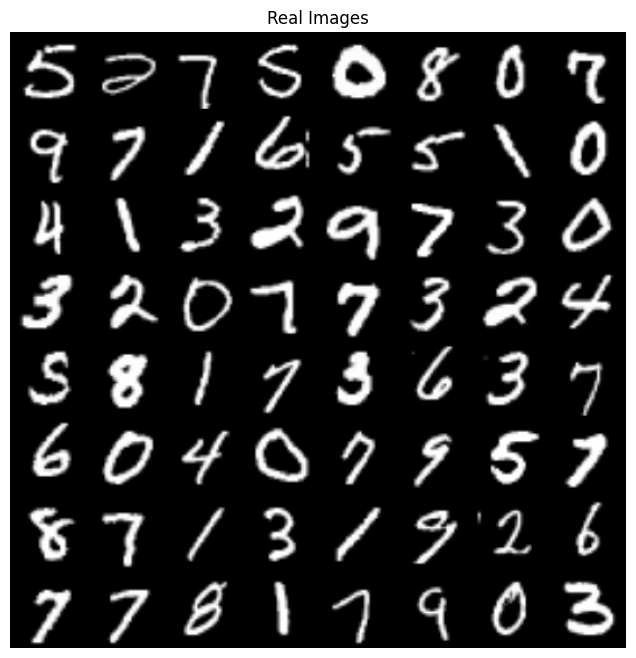

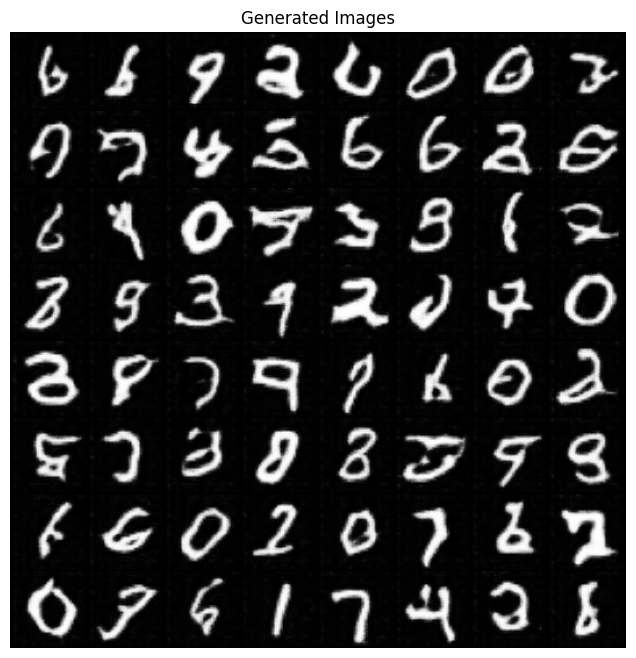

In [29]:
real_batch = next(iter(dataloader))[0][:64]
show_images(real_batch, "Real Images")
show_images(fake_images, "Generated Images")

##### **Q24: How do you save generated images during training to evaluate the progression of the DCGAN's performance?**

In [32]:
import os
os.makedirs("dcgan_outputs", exist_ok=True)

def save_images(images, path, index):
    grid = make_grid(images, nrow=8, normalize=True)
    torchvision.utils.save_image(grid, f"{path}/dcgan_epoch_{index:03d}.png")

In [33]:
# example: saving after final epoch
save_images(fake_images, "dcgan_outputs", epochs)

## Evaluating the model


##### **Q25: How do you evaluate the quality of the images generated by the DCGAN after a certain number of epochs?**


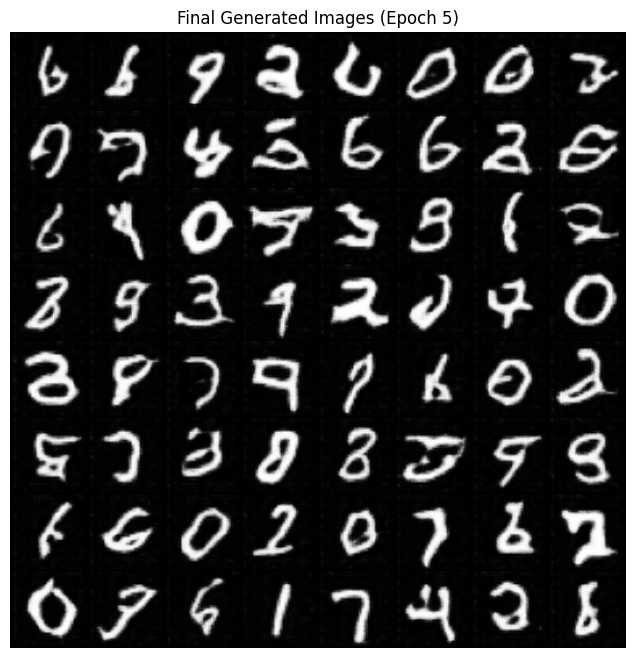

In [35]:
fake_images = generate_images(generator, fixed_noise)
show_images(fake_images, f"Final Generated Images (Epoch {epochs})")

##### **Q26: How do you save the trained generator and discriminator models for later use or evaluation?**

In [36]:
os.makedirs("models", exist_ok=True)
torch.save(generator.state_dict(), "models/generator.pth")
torch.save(discriminator.state_dict(), "models/discriminator.pth")

## Experimenting with hyperparameters


##### **Q27: How do you experiment with different latent vector sizes in the generator and observe their effect on the quality of generated images?**


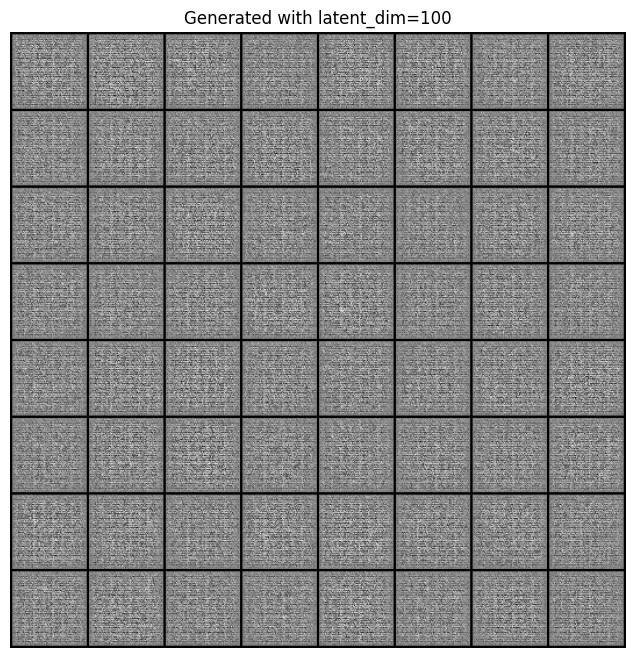

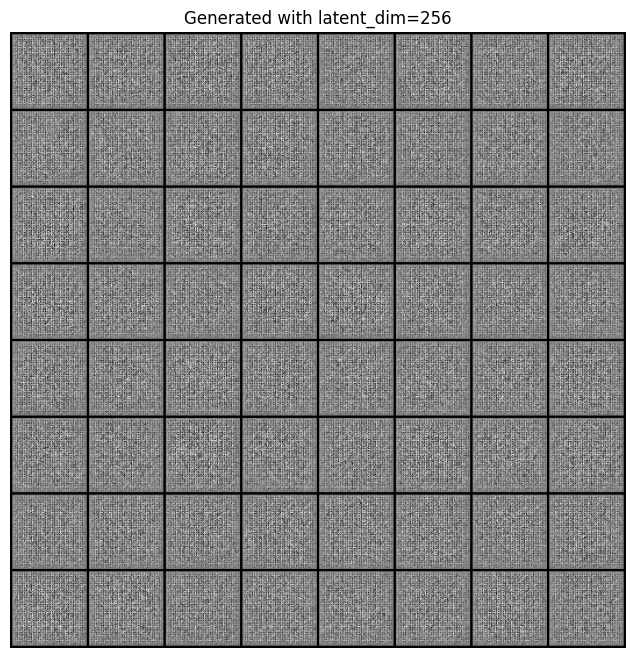

In [37]:
latent_sizes = [64, 100, 256]
generated_sets = {}

for latent_dim_exp in latent_sizes:
    G = Generator(latent_dim_exp, feature_map_gen, image_channels).to(device)
    G.apply(weights_init)
    z = torch.randn(64, latent_dim_exp, 1, 1, device=device)
    fake_set = G(z).detach().cpu()
    generated_sets[latent_dim_exp] = fake_set

for latent_dim_exp, imgs in generated_sets.items():
    show_images(imgs, f"Generated with latent_dim={latent_dim_exp}")

##### **Q28: How do you adjust the learning rates for the generator and discriminator to stabilize training?**


In [38]:
lrs = [0.00005, 0.0002, 0.0005]

for lr_val in lrs:
    G = Generator(latent_dim, feature_map_gen, image_channels).to(device)
    D = Discriminator(feature_map_disc, image_channels).to(device)
    G.apply(weights_init)
    D.apply(weights_init)

    opt_G = optim.Adam(G.parameters(), lr=lr_val, betas=(0.5, 0.999))
    opt_D = optim.Adam(D.parameters(), lr=lr_val, betas=(0.5, 0.999))

    # short test: generate and show images after init
    z = torch.randn(64, latent_dim, 1, 1, device=device)
    with torch.no_grad():
        imgs = G(z).detach().cpu()
    show_images(imgs, f"Init with lr={lr_val}")

##### **Q29: How do you experiment with different architectures for the generator and observe the effect on image quality?**


In [39]:
class GeneratorAlt(nn.Module):
    def __init__(self, latent_dim, feature_map_size, image_channels):
        super(GeneratorAlt, self).__init__()
        self.net = nn.Sequential(
            nn.ConvTranspose2d(latent_dim, feature_map_size * 4, 7, 1, 0, bias=False),
            nn.BatchNorm2d(feature_map_size * 4),
            nn.ReLU(True),
            nn.ConvTranspose2d(feature_map_size * 4, feature_map_size * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(feature_map_size * 2),
            nn.ReLU(True),
            nn.ConvTranspose2d(feature_map_size * 2, feature_map_size, 4, 2, 1, bias=False),
            nn.BatchNorm2d(feature_map_size),
            nn.ReLU(True),
            nn.ConvTranspose2d(feature_map_size, image_channels, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, x):
        return self.net(x)

In [40]:
G_alt = GeneratorAlt(latent_dim, feature_map_gen, image_channels).to(device)
G_alt.apply(weights_init)
z = torch.randn(64, latent_dim, 1, 1, device=device)
imgs_alt = G_alt(z).detach().cpu()
show_images(imgs_alt, "Alt Architecture Output")

##### **Q30: How do you experiment with different batch sizes and observe their effect on the training stability and quality of generated images?**

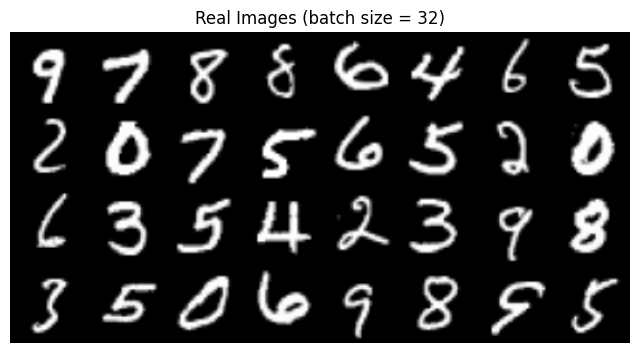

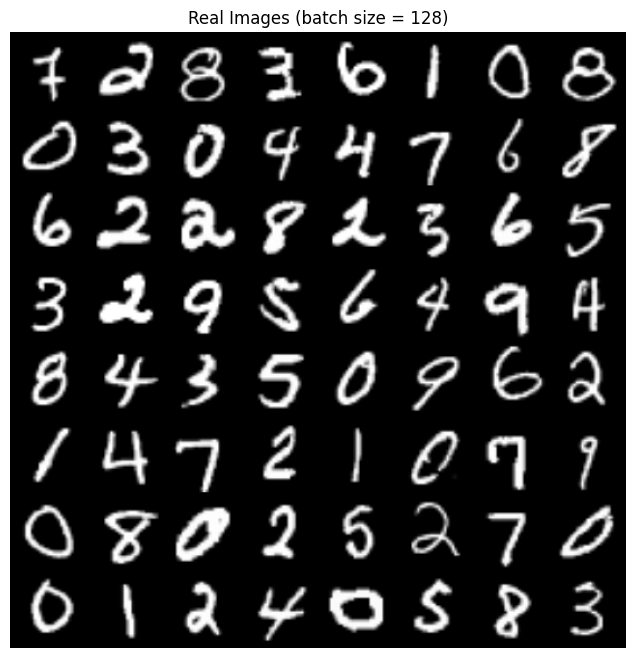

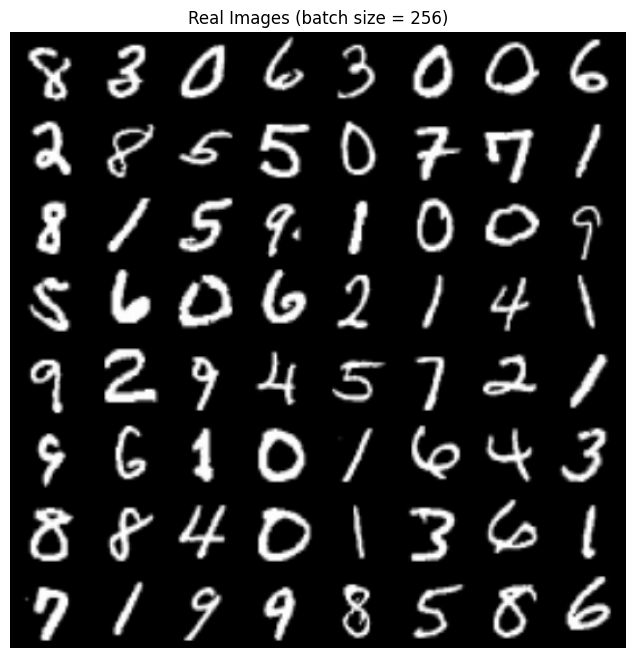

In [41]:
batch_sizes = [32, 128, 256]
for bs in batch_sizes:
    loader = DataLoader(dataset, batch_size=bs, shuffle=True, num_workers=2)
    images = next(iter(loader))[0][:64]
    show_images(images, f"Real Images (batch size = {bs})")

In [42]:
import shutil
shutil.rmtree("data", ignore_errors=True)
shutil.rmtree("dcgan_outputs", ignore_errors=True)
shutil.rmtree("models", ignore_errors=True)